In [1]:
import STAligner

#the location of R (used for the mclust clustering)
import os
#os.environ['R_HOME'] = '/home/bailab/miniconda3/envs/env_STAligner/lib/R'
#os.environ['R_USER'] = '/home/bailab/miniconda3/envs/env_STAligner/lib/python3.10/site-packages/rpy2'
#import rpy2.robjects as robjects
#import rpy2.robjects.numpy2ri

import anndata as ad
import scanpy as sc
import pandas as pd
import numpy as np
import scipy.sparse as sp
import scipy.linalg
import matplotlib.pyplot as plt

import torch
used_device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
!pip --python `which python` install scanpy==1.9.8

In [ ]:
sc.settings.figdir = '/data/project/AI4Omic/MASLD/results/ST/STAligner/'
sc.set_figure_params(dpi=300, fontsize=10, dpi_save=300, format='pdf', facecolor="white")

In [ ]:
#sp_data_folder = '/data/project/AI4Omic/MASLD/data/ST/'
sp_data_folder = '/data/project/AI4Omic/MASLD/data/Rawdata/Visium'
section_ids = [d for d in os.listdir(sp_data_folder) if os.path.isdir(os.path.join(sp_data_folder, d))]
#section_ids.pop(section_ids.index('NAFL-171'))

In [5]:
adatas = {}
adj_list = []
for section_id in section_ids:
    adata = sc.read_visium(path=os.path.join(sp_data_folder, section_id, 'outs'), count_file='filtered_feature_bc_matrix.h5', load_images=True)
    adata.var_names_make_unique(join='++')
    adata.obs['disease_status'] = section_id.split('-')[0]
    
    # update spatial uns
    file = list(adata.uns['spatial'].keys())[0]
    adata.uns['spatial'][section_id] = adata.uns['spatial'][file].copy()
    if file != section_id:
        del adata.uns['spatial'][file]
    print(adata.uns['spatial'].keys())

    #make spot name unique
    adata.obs_names =  [section_id + '_' + x for x in adata.obs_names]
    
    # QC filtering
    sc.pp.filter_cells(adata, min_counts=400)
    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.filter_genes(adata, min_cells=3)
    
    #Constructing the spatial network
    #STAligner.Cal_Spatial_Net(adata, rad_cutoff=350) #the spatial network are saved in adata.uns['adj]
    STAligner.Cal_Spatial_Net(adata, model='KNN', k_cutoff=6)
    #STAligner.Stats_Spatial_Net(adata) #plot the number of spatial neighbors
    
    #Normalization
    adata.raw = adata.copy()
    sc.pp.highly_variable_genes(adata, flavor='seurat_v3', n_top_genes=14000) #ensure enough common HVGs in the combined matrix
    # Ensure marker genes are included in highly variable genes
    for key, genes in marker_genes_dict.items():
        for gene in genes:
            adata.var.loc[gene, 'highly_variable'] = True
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    adata = adata[:, adata.var['highly_variable']]

    adj_list.append(adata.uns['adj'])
    adatas[section_id] = adata

/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['CTRL-179'])
------Calculating spatial graph...
The graph contains 29382 edges, 4897 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-0422'])
------Calculating spatial graph...
The graph contains 5976 edges, 996 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['CTRL-180'])
------Calculating spatial graph...
The graph contains 6378 edges, 1063 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-1481'])
------Calculating spatial graph...
The graph contains 6108 edges, 1018 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-1086'])
------Calculating spatial graph...
The graph contains 6234 edges, 1039 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASLD-1492'])
------Calculating spatial graph...
The graph contains 6660 edges, 1110 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-1494'])
------Calculating spatial graph...
The graph contains 7128 edges, 1188 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASLD-1495'])
------Calculating spatial graph...
The graph contains 4650 edges, 775 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASLD-1498'])
------Calculating spatial graph...
The graph contains 5832 edges, 972 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-3096'])
------Calculating spatial graph...
The graph contains 4830 edges, 805 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASLD-1493'])
------Calculating spatial graph...
The graph contains 6786 edges, 1131 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-2534'])
------Calculating spatial graph...
The graph contains 5514 edges, 919 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-1501'])
------Calculating spatial graph...
The graph contains 7674 edges, 1279 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-1478'])
------Calculating spatial graph...
The graph contains 5886 edges, 981 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-0413'])
------Calculating spatial graph...
The graph contains 5634 edges, 939 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['CTRL-161'])
------Calculating spatial graph...
The graph contains 13446 edges, 2241 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASLD-0966'])
------Calculating spatial graph...
The graph contains 4212 edges, 702 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-1475'])
------Calculating spatial graph...
The graph contains 5082 edges, 847 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-9440'])
------Calculating spatial graph...
The graph contains 5868 edges, 978 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASLD-1497'])
------Calculating spatial graph...
The graph contains 4500 edges, 750 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASLD-1479'])
------Calculating spatial graph...
The graph contains 6090 edges, 1015 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-4426'])
------Calculating spatial graph...
The graph contains 4026 edges, 671 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-1480'])
------Calculating spatial graph...
The graph contains 6012 edges, 1002 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-7866'])
------Calculating spatial graph...
The graph contains 2844 edges, 474 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['CTRL-8715'])
------Calculating spatial graph...
The graph contains 27744 edges, 4624 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-0835'])
------Calculating spatial graph...
The graph contains 3480 edges, 580 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-9136'])
------Calculating spatial graph...
The graph contains 3606 edges, 601 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-3344'])
------Calculating spatial graph...
The graph contains 3114 edges, 519 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASLD-2768'])
------Calculating spatial graph...
The graph contains 4494 edges, 749 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['CTRL-5759'])
------Calculating spatial graph...
The graph contains 25524 edges, 4254 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASLD-4973'])
------Calculating spatial graph...
The graph contains 5700 edges, 950 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASLD-9993'])
------Calculating spatial graph...
The graph contains 3894 edges, 649 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['CTRL-5113'])
------Calculating spatial graph...
The graph contains 23532 edges, 3922 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['CTRL-8395'])
------Calculating spatial graph...
The graph contains 14100 edges, 2350 cells.
6.0000 neighbors per cell on average.


/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


dict_keys(['MASH-8684'])
------Calculating spatial graph...
The graph contains 6984 edges, 1164 cells.
6.0000 neighbors per cell on average.


Concat the scanpy objects for multiple slices

In [6]:
adata_concat = ad.concat(adatas, uns_merge="only", label='sample') # , join='outer', fill_value=0
adata_concat.obs['batch_name'] = adata_concat.obs['sample'].astype('category').copy()

In [7]:
adata_concat

AnnData object with n_obs × n_vars = 48154 × 470
    obs: 'in_tissue', 'array_row', 'array_col', 'disease_status', 'n_counts', 'n_genes', 'sample', 'batch_name'
    uns: 'spatial'
    obsm: 'spatial'

Concat the spatial network for multiple slices

In [8]:
adj_concat = np.asarray(adj_list[0].todense())
for batch_id in range(1, len(section_ids)):
    adj_concat = scipy.linalg.block_diag(adj_concat,np.asarray(adj_list[batch_id].todense()))
adata_concat.uns['edgeList'] = np.nonzero(adj_concat)   

Running STAligner

In [9]:
# "iter_comb" is used to specify the order of integration
#margin is used to control the intensity of batch correction
adata_concat = STAligner.train_STAligner(adata_concat, iter_comb=None, verbose=True, device=used_device, margin=1.0)

STAligner(
  (conv1): GATConv(470, 512, heads=1)
  (conv2): GATConv(512, 30, heads=1)
  (conv3): GATConv(30, 512, heads=1)
  (conv4): GATConv(512, 470, heads=1)
)
Pretrain with STAGATE...


100%|██████████| 500/500 [00:54<00:00,  9.18it/s]


Train with STAligner...


  0%|          | 0/500 [00:00<?, ?it/s]

Update spot triplets at epoch 500


 20%|█▉        | 99/500 [06:17<00:26, 15.20it/s]   

Update spot triplets at epoch 600


 40%|███▉      | 199/500 [15:30<00:21, 14.22it/s]  

Update spot triplets at epoch 700


 60%|█████▉    | 299/500 [26:12<00:14, 13.99it/s]  

Update spot triplets at epoch 800


 80%|███████▉  | 399/500 [36:46<00:07, 13.76it/s]  

Update spot triplets at epoch 900


100%|██████████| 500/500 [48:19<00:00,  5.80s/it]   


Clustering

In [10]:
STAligner.mclust_R(adata_concat, num_cluster=4, used_obsm='STAligner')

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


AnnData object with n_obs × n_vars = 48154 × 470
    obs: 'in_tissue', 'array_row', 'array_col', 'disease_status', 'n_counts', 'n_genes', 'sample', 'batch_name', 'mclust'
    uns: 'spatial', 'edgeList'
    obsm: 'spatial', 'STAGATE', 'STAligner'

Visualization

In [11]:
sc.pp.neighbors(adata_concat,use_rep='STAligner', random_state=666)
sc.tl.umap(adata_concat, random_state=666)

/home/bailab/miniconda3/envs/env_STAligner/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
# raw data saving
adata_concat = adata_concat.raw.to_adata()
adata_concat.layers['counts'] = adata_concat.X.copy()

# Quality Control
adata_concat.var["mt"] = adata_concat.var_names.str.startswith("MT-")
adata_concat.var["ribo"] = adata_concat.var_names.str.startswith(("RPS", "RPL"))
adata_concat.var["hb"] = adata_concat.var_names.str.contains("^HB[^(P)(E)]")
sc.pp.calculate_qc_metrics(adata_concat, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True)

# data normalization
sc.pp.normalize_total(adata_concat, target_sum=1e4)
sc.pp.log1p(adata_concat)
adata_concat.layers['scaled'] = sc.pp.scale(adata_concat, copy=True, max_value=10).X

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (3,3)
plt.rcParams['font.size'] = 12
sc.pl.umap(adata_concat, color = ['sample', 'disease_status', 'mclust'], ncols=3, wspace=0.8, show=True, save='UMAP-sample-group-mclust.pdf')

In [ ]:
sc.pl.spatial(adata_concat[adata_concat.obs['sample']=='CTRL-179'], color=['mclust'], library_id='CTRL-179', size=1.5)

In [ ]:
#adata_concat.obs['sample'] = pd.Series(adata_concat.obs['sample']).replace({'ZTH-1479':'NAFL-1479', 'ZLM-1497':'NAFL-1497', 'ZHT-1475':'NASH-1475', 'YM-171':'NAFL-171', 'XRP-1493':'NAFL-1493', 'LSH-1498':'NAFL-1498', 'LP-1494':'NASH-1494', 'LLF-1492':'NAFL-1492', 'LCQ-1481':'NASH-1481', 'HJJ-1480':'NASH-1480', 'HJD-1478':'NASH-1478', 'CYL-1501':'NASH-1501', 'CYG-1495':'NAFL-1495'})
#adata_concat.obs['group'] = pd.Series(adata_concat.obs['group']).replace({'HD':'Control'})
adata_concat.uns['edgeList'] = None
adata_concat.write('/data/project/AI4Omic/NAFLD/results/ST/STAligner/STAligner_adata_concat.h5ad')

In [ ]:
adata_concat = sc.read_h5ad('/data/project/AI4Omic/NAFLD/results/ST/STAligner/STAligner_adata_concat.h5ad')

In [ ]:
sc.tl.rank_genes_groups(adata_concat, 'mclust', method='wilcoxon')
sc.pl.rank_genes_groups(adata_concat, n_genes=20, sharey=False, save=True)

In [4]:
cluster2annotation = {
    1:'Mid',
    2:'Central',
    3:'Portal',
    4:'Peri-portal',
}
#add a new `.obs` column called `Molecular_Niche` by mapping mclust to annotation using pandas `map` function
adata_concat.obs['Zonation'] = adata_concat.obs['mclust'].map(cluster2annotation).astype('category')
adata_concat.obs['Zonation'] = adata_concat.obs['Zonation'].cat.reorder_categories(['Portal', 'Peri-portal', 'Mid', 'Central'])

# Define Zonation colors
adata_concat.uns['Zonation_colors'] = ['#64bcdb', '#e5a7d0', '#eabde4', '#8d435e']

In [ ]:
# Zonation markers
marker_genes_dict = {
    'Portal': ['PTGDS', 'SOD3', 'DPT', 'MGP', "FBLN1", 'TPM2'],
    'Peri-portal' : ['TMEM45B', 'SDS', 'HAL', 'GLS2', 'SLPI', 'SYT7'],
    'Mid' : ['NNMT', 'HSD3B7'],
    'Central': ['CYP7A1', 'CYP2E1','CYP1A2','CYP3A4','SLCO1B3'],
}

In [13]:
adata_concat.obs['disease_status'] = adata_concat.obs['disease_status'].cat.rename_categories({'MASLD': 'MASL'})
adata_concat.obs['disease_status'] = adata_concat.obs['disease_status'].cat.reorder_categories(['CTRL', 'MASL', 'MASH'])
adata_concat.obs['sample'] = adata_concat.obs['sample'].str.replace('MASLD', 'MASL')
adata_concat.obs_names = adata_concat.obs_names.str.replace("MASLD", "MASL")
adata_concat.uns['spatial'] = {x.replace("MASLD", "MASL"): v for x, v in adata_concat.uns['spatial'].items()}

In [ ]:
plt.rcParams['figure.figsize'] = (3,3)
plt.rcParams['font.size'] = 12
sc.pl.umap(adata_concat, color = ['Zonation'], ncols=1, wspace=1.0, show=True, save='Zonation.pdf', frameon=True)

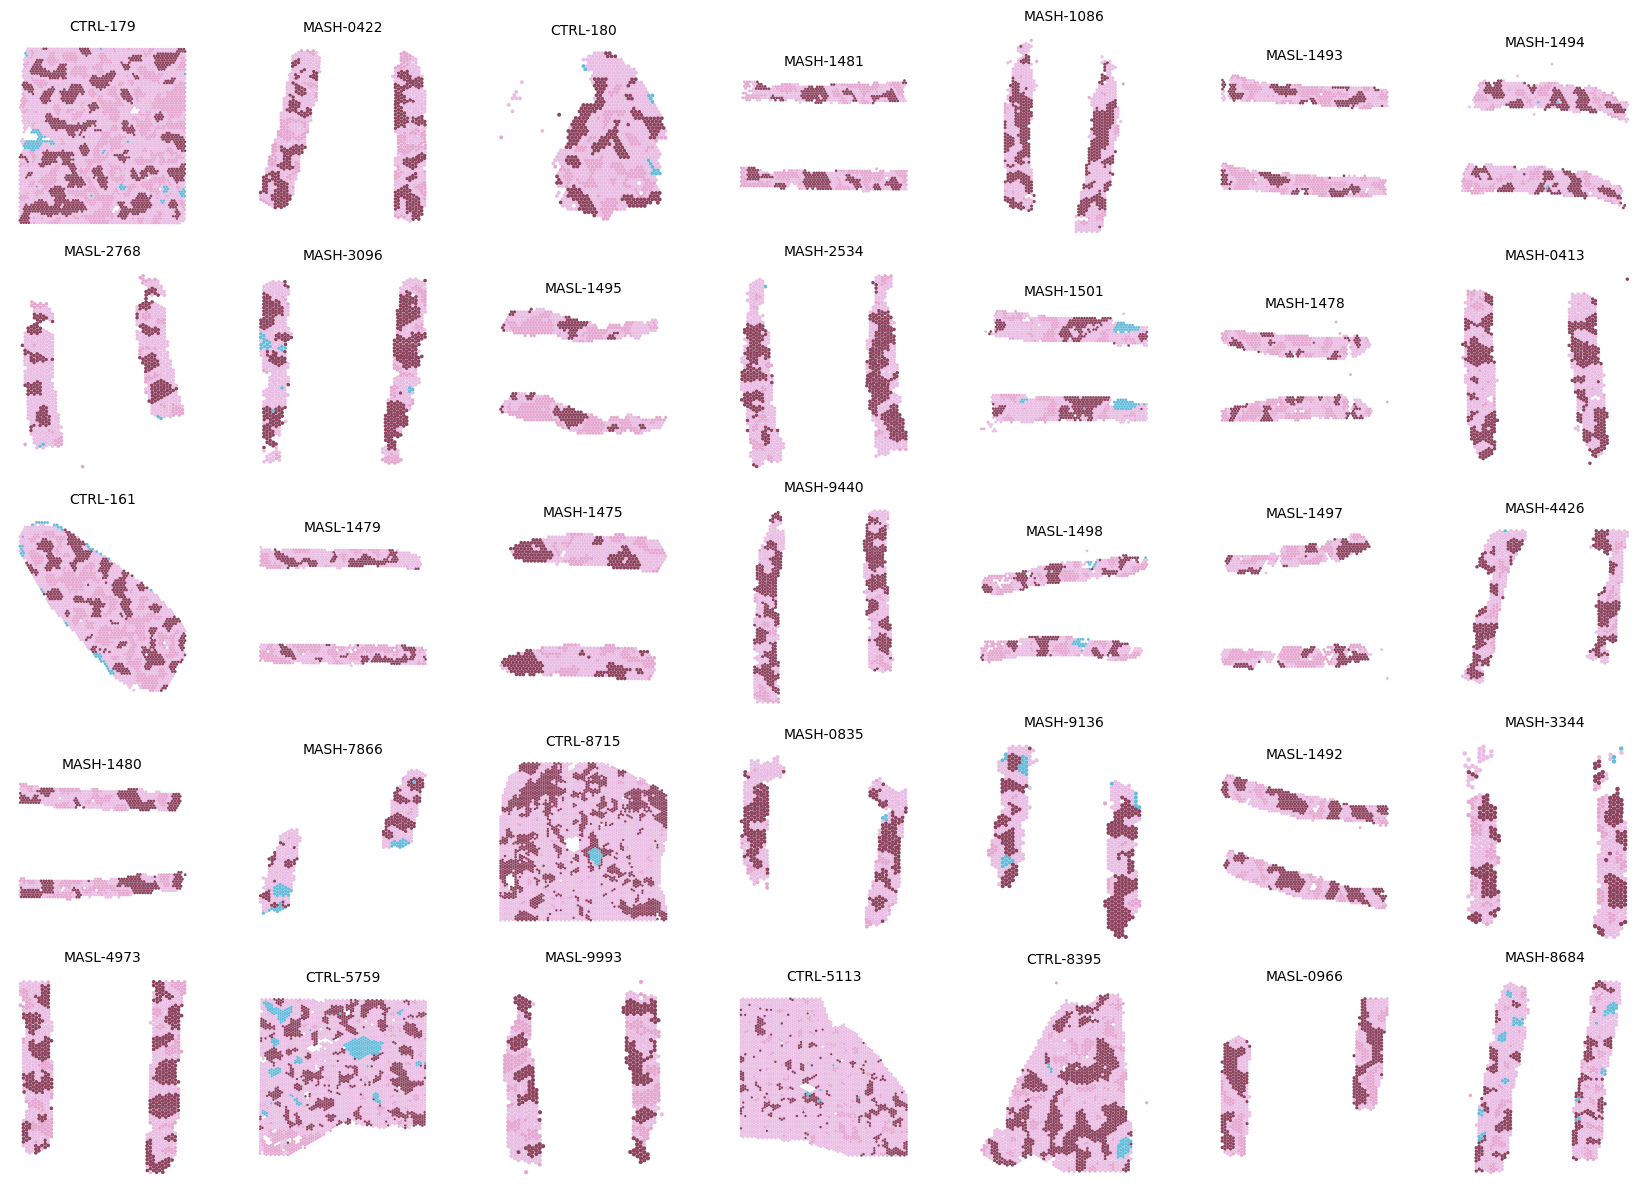

In [ ]:
title_size = 10
fig,axs = plt.subplots(5, 7, figsize=(21, 15), gridspec_kw={'wspace':0.3, 'hspace':0.1})
for ss in range(len(section_ids)):
    _sc_0 = sc.pl.spatial(adata_concat[adata_concat.obs['sample'] ==  section_ids[ss]], color='Zonation', size=1.6, frameon=False, title=section_ids[ss], legend_loc=None, library_id=section_ids[ss], img_key=None, ax=axs[ss//7,ss%7], legend_fontsize=6, show=False)
    _sc_0[0].set_title(f"{section_ids[ss]}", size=title_size)
plt.savefig('/data/project/AI4Omic/MASLD/results/ST/STAligner/All_samples.pdf', bbox_inches='tight', dpi=300)

In [ ]:
with rc_context({'figure.figsize':(5,4)}):
    sc.pl.spatial(adata_concat[adata_concat.obs['sample'] ==  'CTRL-179'], color='Zonation', size=1.6, save=f'CTRL-179-Zonation.pdf', frameon=False, library_id=sample, img_key=None, title='')

In [ ]:
from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize':(5,4)}):
    for sample in ['CTRL-179', 'MASLD-1495', 'MASH-1494']:
        sc.pl.spatial(adata_concat[adata_concat.obs['sample'] ==  sample], color='Zonation', size=1.6, save=f'{sample}-Zonation.pdf', frameon=False, legend_loc=None, library_id=sample, img_key=None, title='')

In [ ]:
# import pickle
#with open('/data/project/AI4Omic/MASLD/results/ST/STAligner/Batch_list.pkl', 'wb') as file:
#    pickle.dump(Batch_list, file)
# Saving results
adata_concat.write('/data/project/AI4Omic/MASLD/results/ST/STAligner/adata_concat_post.h5ad')
adata_concat.obs.to_csv('/data/project/AI4Omic/MASLD/results/ST/STAligner/adata_concat_STAligner_obs.csv')

In [ ]:
# Loading adata_concat object
adata_concat = sc.read_h5ad('/data/project/AI4Omic/MASLD/results/ST/STAligner/adata_concat_post.h5ad')
import pickle
with open('/data/project/AI4Omic/MASLD/results/ST/STAligner/Batch_list.pkl', 'rb') as file:
    Batch_list = pickle.load(file)